In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
%load_ext autoreload
%autoreload 2


In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = 40,10
plt.rcParams["font.size"] = 15

In [4]:
from one.utils import *
from one.data.ucrdata import UcrDataReader

In [5]:
ROOT_DIR = "./data/ucr/"
t = get_files_from_path("./data/ucr")

In [6]:
d = UcrDataReader()
test = d(ROOT_DIR+t[33])

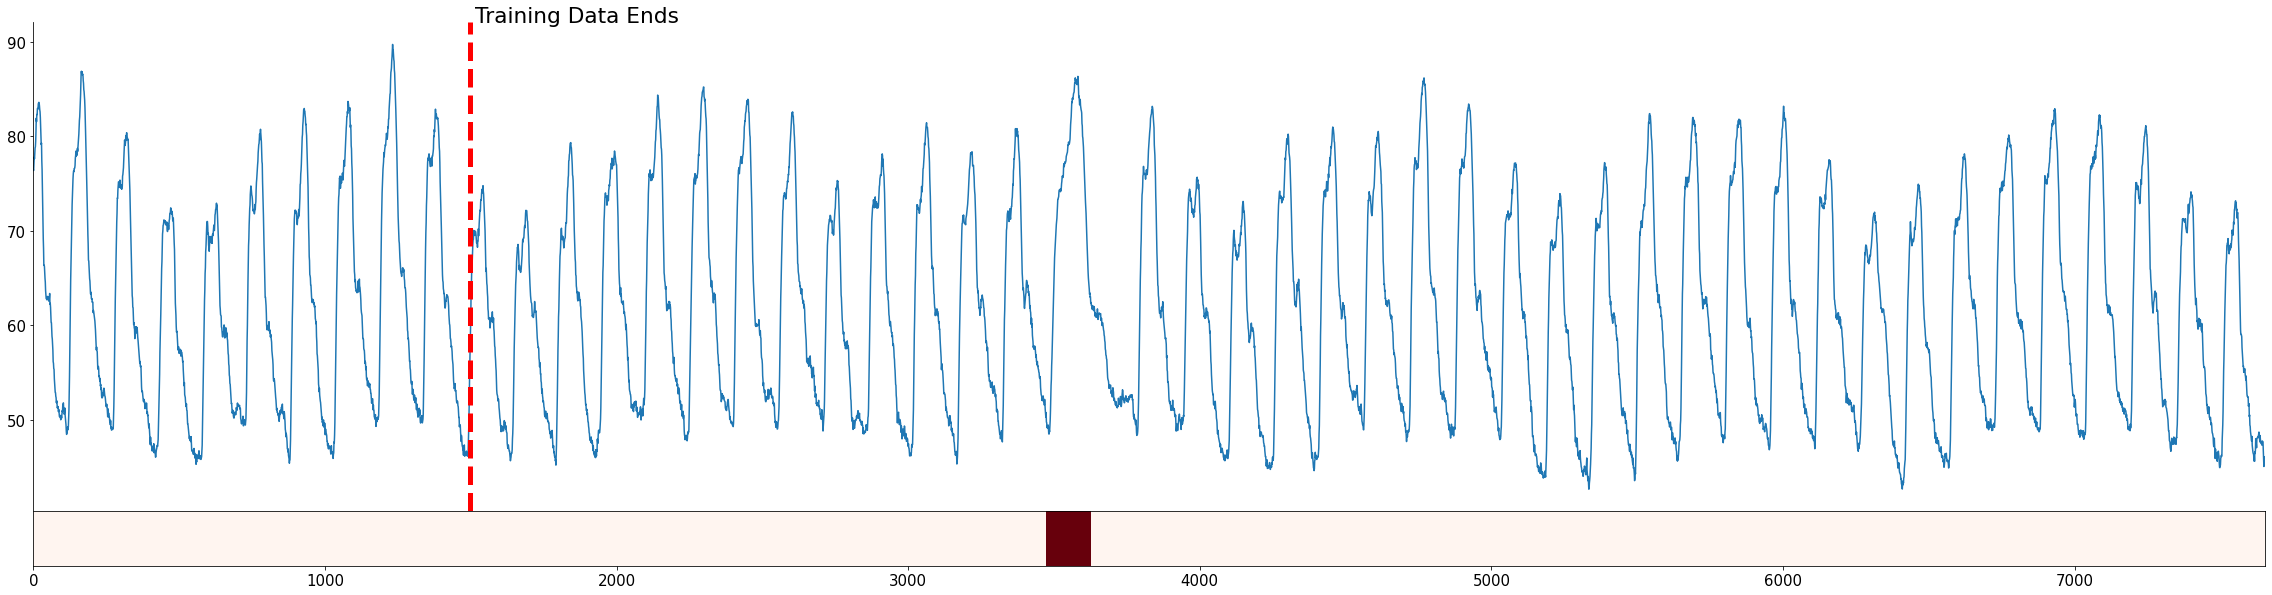

In [7]:
p = graph_data(test.series, test.labels, test.train_len)

In [ ]:
from one.models.predictive.nbeats import NBEATSModel

In [ ]:
def hypertune(params: dict):
    w = int(params.get("w"))
    s = int(params.get("s"))
    
    tr_data, tr_label = test.train
    test_data, test_label = test.get_test_with_window(w)
    
    model = NBEATSModel(w, s, True, val_split=max(0.10, (w+s)/len(tr_data)+0.01) )
    model.fit(tr_data)
    score, res, _ = model.get_scores(test_data)
    # return np.average(acf(score, fft=False, nlags=5)).item()
    return np.sum(res**2)


In [ ]:
from hyperopt import fmin, tpe, hp
from statsmodels.tsa.stattools import acf


best = fmin(hypertune,
    space= {'w': hp.quniform("w", 20, 0.2*len(test.train[0]), 5), 
            "s": hp.quniform("s", 1, 20, 1)},
    algo=tpe.suggest,
    max_evals=20)

In [ ]:
best

In [ ]:
w = 160
s = 2

In [ ]:
tr_data, tr_label = test.train
test_data, test_label = test.get_test_with_window(w)

In [ ]:
model = NBEATSModel(w, s, True, val_split=0.15)

In [ ]:
model.fit(tr_data)

In [ ]:
score, res, preds = model.get_scores(test_data)

In [ ]:
f, (a,b) = plt.subplots(nrows=2)
a.plot(score)
a.plot(test.test[1])
b.plot(test.test[0])

In [ ]:
f, (a,b) = plt.subplots(nrows=2)
a.plot(preds)
b.plot(test.test[0])

In [ ]:
import seaborn as sns

sns.distplot(score)

# Scratch

In [166]:
from one.models.predictive.rnn import RNNModel

In [167]:
tr_data, tr_label = test.train
test_data, test_label = test.test

In [168]:
model = RNNModel(rnn_model="RNN")

In [ ]:
model.hyperopt_ws(tr_data, test_data, 5)

[I 2022-05-24 16:12:01,714] A new study created in memory with name: no-name-34521558-2c40-45de-bef0-f42e2aaf07dd
[2022-05-24 16:12:01,730] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 910 samples.
[2022-05-24 16:12:01,730] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 910 samples.
2022-05-24 16:12:01 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 910 samples.
[2022-05-24 16:12:01,737] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-05-24 16:12:01,737] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
2022-05-24 16:12:01 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU ava

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
tr_data, tr_label = test.train
test_data, test_label = test.get_test_with_window(model.window)

In [92]:
model.fit(tr_data)

In [93]:
score, res, preds = model.get_scores(test_data)

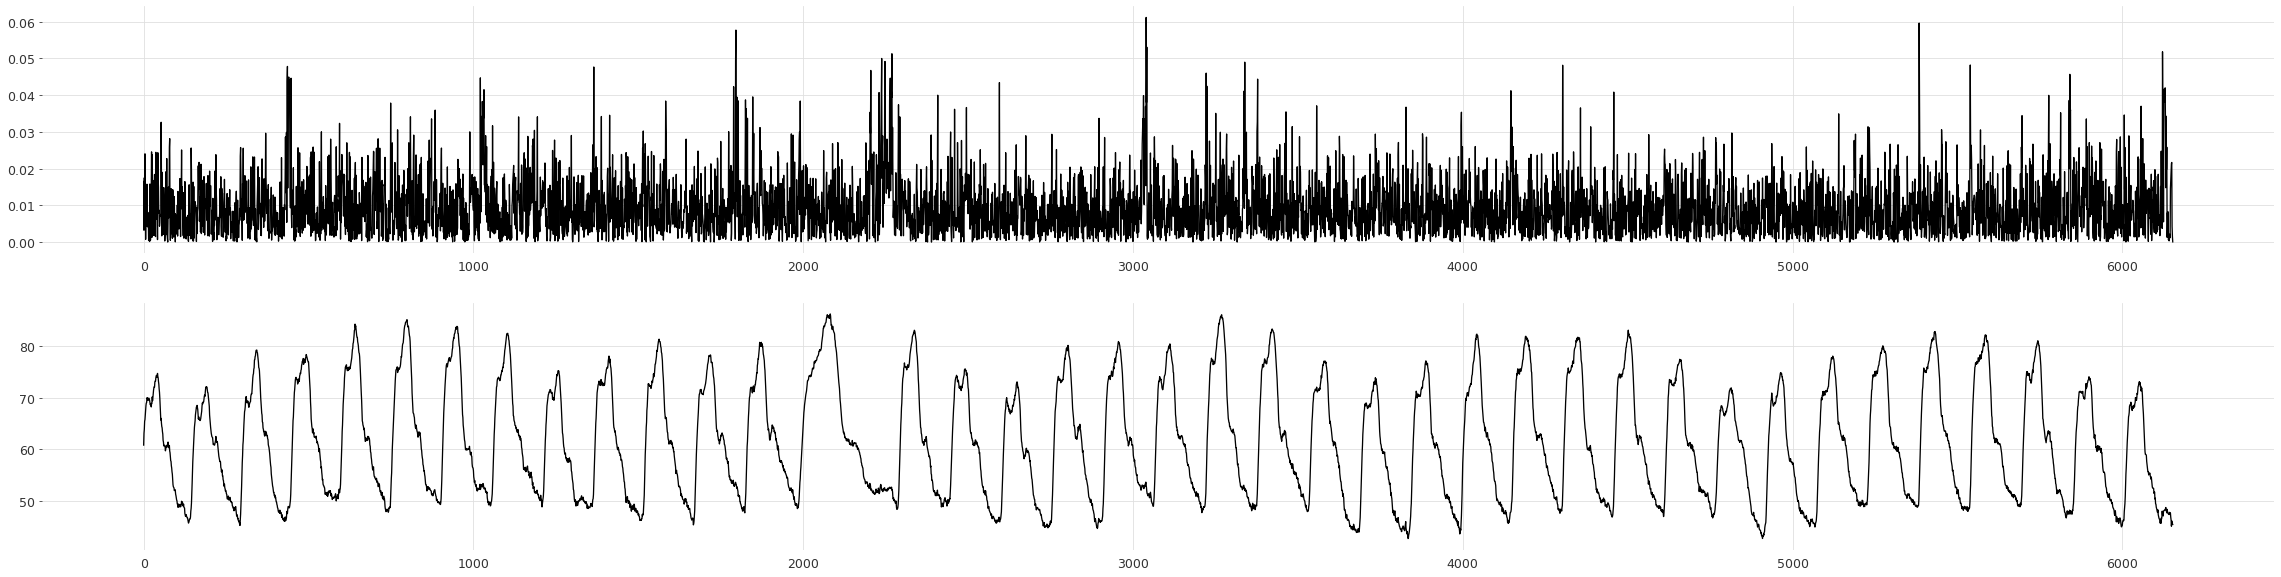

In [94]:
f, (a,b) = plt.subplots(nrows=2)
a.plot(score)
#a.plot(test.test[1])
b.plot(test.test[0])

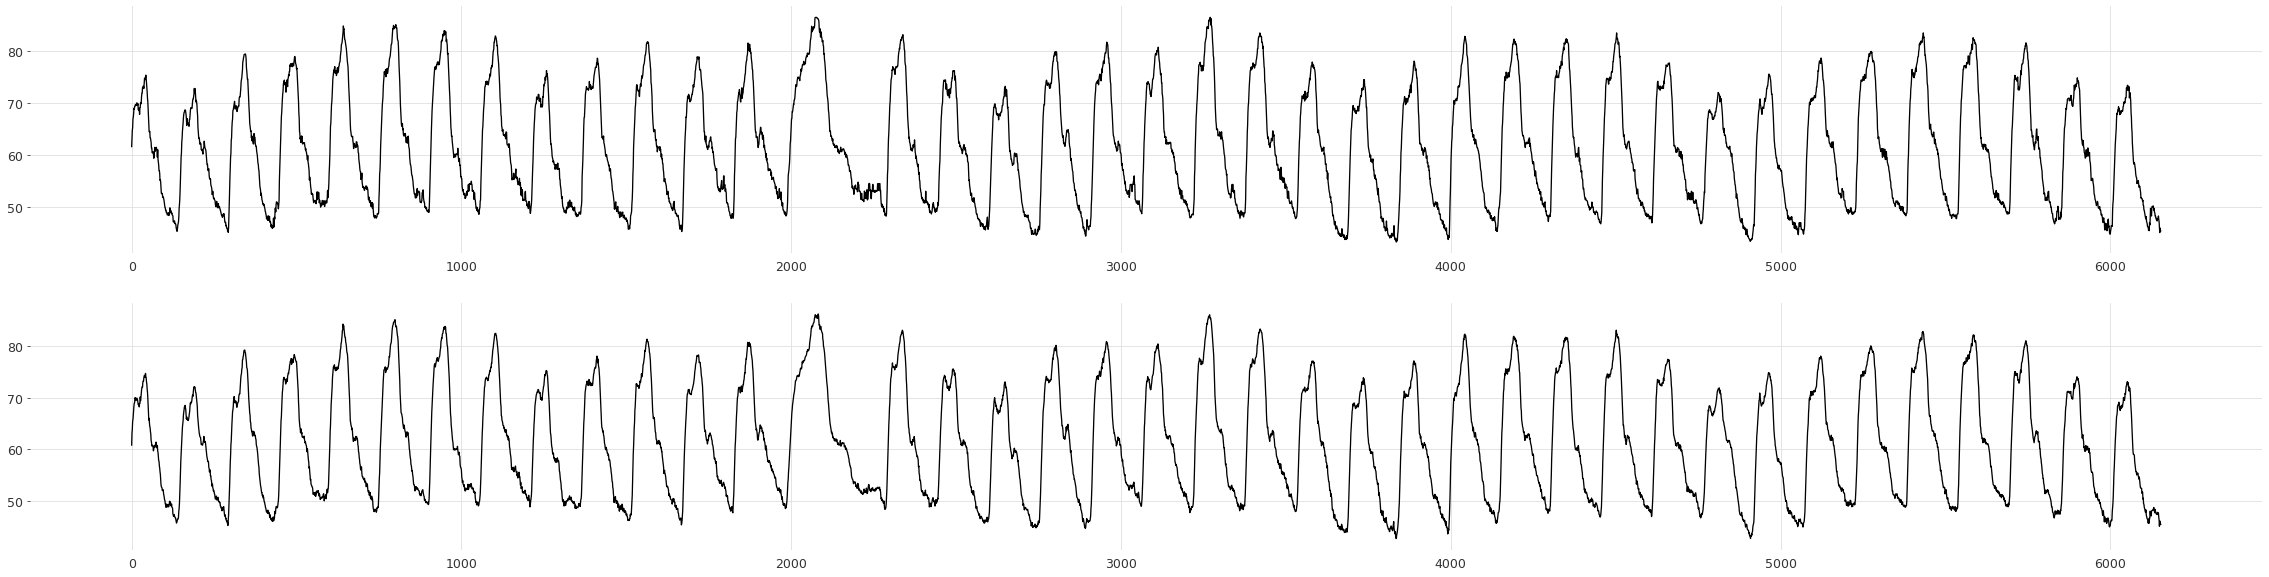

In [95]:
f, (a,b) = plt.subplots(nrows=2)
a.plot(preds)
b.plot(test.test[0])